In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate, savefig

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)
from empiricaldist import Pmf

In [2]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G
fb = read_graph('facebook_combined.txt')

In [6]:
def degrees(G):
    return [G.degree(u) for u in G]

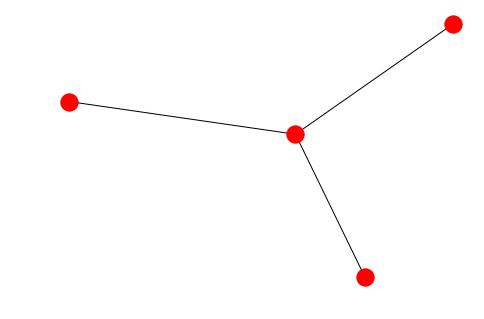

In [4]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)
nx.draw(G)

In [10]:
degrees(G)
#Pmf(degrees(G))
pmf = Pmf.from_seq(degrees(G))
print(pmf)

1    0.75
3    0.25
dtype: float64


In [13]:
pmf_fb = Pmf(degrees(fb))
pmf_fb.mean(), pmf_fb.std()

(348012741, nan)

In [15]:
pmf_fb[1]

17

Text(0, 0.5, 'PMF')

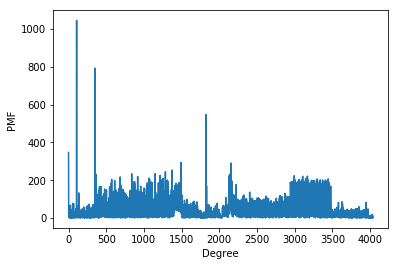

In [21]:
pmf_fb.plot(label='Facebook', color='C0')
plt.xlabel('Degree')
plt.ylabel('PMF')

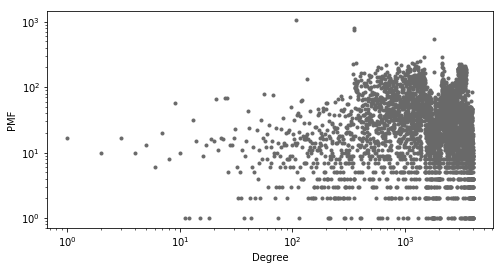

In [28]:
plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')
pmf_fb.plot(label='Facebook', color='dimgrey', **options)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('PMF')
plt.savefig("fb_degree_distribution")

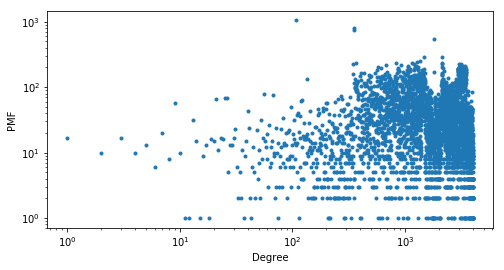

In [27]:
actors = read_graph('actor-movie.dat')
pmf_actors = Pmf(degrees(actors))


plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')
pmf_fb.plot(label='Facebook', color='C0', **options)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('PMF')
plt.savefig("actors_degree_distribution")